['cudnn', 'batch_size', 'in_channels', 'out_channels', 'w_h', '"kW', '_kH"', 'stride', 'pad']
last 3 columns: original time, time without dilation check, percentage difference

('7605', '1', '32', '32', '112', '3', '2', '1', '32'), back,  2.516e-04,  3.911e-04, -0.555
('7605', '1', '32', '32', '112', '3', '2', '1', '32'), all_,  3.437e-04,  4.878e-04, -0.419
('7605', '1', '32', '32', '56', '1', '1', '0', '32'), back,  2.719e-04,  3.977e-04, -0.463
('7605', '1', '32', '32', '56', '1', '1', '0', '32'), all_,  3.480e-04,  4.880e-04, -0.402
('7605', '1', '32', '32', '56', '3', '1', '1', '32'), back,  2.702e-04,  3.929e-04, -0.454
('7605', '1', '32', '32', '56', '3', '1', '1', '32'), all_,  3.460e-04,  4.832e-04, -0.396
('7605', '1', '32', '32', '56', '1', '2', '0', '32'), back,  2.705e-04,  4.070e-04, -0.504
('7605', '1', '32', '32', '56', '1', '2', '0', '32'), all_,  3.485e-04,  4.995e-04, -0.433
('7605', '1', '32', '32', '56', '3', '2', '1', '32'), back,  2.715e-04,  3.997e-04, -0.472
('

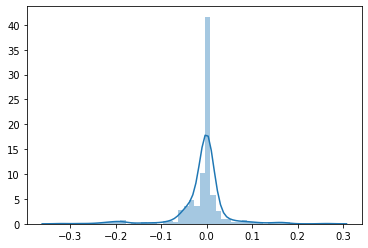

mean= 0.0006840032367489158


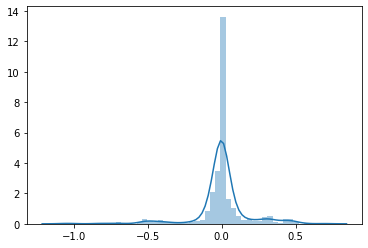

mean= 0.00016396953439729706


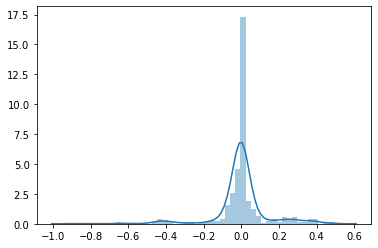

In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

forigin = "cudnn_convtranspose2d-origin.csv"
fwodilation = "cudnn_convtranspose2d-without-dilated-check.csv"

with open(forigin, 'r') as f: 
    origin = f.readlines()
with open(fwodilation, 'r') as f: 
    wodilation = f.readlines()


columns = origin[0].rstrip().split(',')

# print(columns)

def read(_lines):
    d = {}

    for lines in _lines: 
        nums = lines.rstrip().split(',')

        key = tuple(nums[:9])
        t_forward = float(nums[9])
        t_backward = float(nums[10])
        t_all = float(nums[11])

        d[key] = (t_forward, t_backward, t_all)
    
    return d

d_orig = read(origin[1:])
d_wodi = read(wodilation[1:])

forward_diff = []
backward_diff = [] 
all_diff = []

print(origin[0].rstrip().split(',')[:9])
print('last 3 columns: original time, time without dilation check, percentage difference')
print()

for key in d_orig.keys(): 
    t_orig = d_orig[key]
    t_wodi = d_wodi[key]

    def handle(arys: str, idx: int): 
        ary = eval(arys)
        diff = (t_orig[idx] - t_wodi[idx]) / t_orig[idx]
        ary.append(diff)
        if abs(diff) > 0.20: 
            print(f"{key}, {arys[:4]}, {t_orig[idx] : .3e}, {t_wodi[idx] : .3e}, {diff : .3f}", sep='\t') 
    
    handle('forward_diff', 0)
    handle('backward_diff', 1)
    handle('all_diff', 2)

print()

print('mean=', np.mean(forward_diff))
sns.distplot(forward_diff)
plt.show()

print('mean=', np.mean(backward_diff))
sns.distplot(backward_diff)
plt.show()

print('mean=', np.mean(all_diff))
sns.distplot(all_diff)
plt.show()